#                                            Christmas Sales Trend 

#### Data Analysis Workflow: Importing necessary libraries

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Data

In [106]:
# Loading data from local csv file
df = pd.read_csv("D:/Shreeram Prajapati/Brainwave Matrix Solutions/christmas sales trendsdata.csv")
df.head()

,TransactionID,Date,CustomerID,Age,Gender,Location,ProductID,Category,Quantity,UnitPrice,Sales,PaymentType,PromotionApplied,DiscountAmount,Total Amount,GiftWrap,Event,CustomerSatisfaction,ReturnFlag
0,1,24-12-2020,441,27,Other,City_15,106,Toys,5,$96.79,$483.93,Credit Card,False,0.0,$483.93,False,NaN,5,False
1,2,18-11-2022,340,43,Male,City_13,816,Clothing,1,$95.28,$95.28,Credit Card,True,0.0,$95.28,True,NaN,2,True
2,3,26-12-2019,31,25,Other,City_7,508,Clothing,2,$52.37,$104.74,Credit Card,False,0.0,$104.74,False,Christmas Market,4,False
3,4,13-11-2018,39,64,Male,City_20,710,Toys,5,$63.65,$318.24,Debit Card,False,0.0,$318.24,True,NaN,1,True
4,5,13-12-2020,344,26,Other,City_10,687,Toys,3,$57.38,$172.15,Cash,False,0.0,$172.15,True,Christmas Market,4,False


#### Understanding the data & cleaning:

In [107]:
# Checking for null values
df.isnull().sum()

TransactionID              0
Date                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
ProductID                  0
Category                   0
Quantity                   0
 UnitPrice                 0
 Sales                     0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
Total Amount               0
GiftWrap                   0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64

In [108]:
df['Event'] = df['Event'].fillna('Other')

In [109]:
# Remove whitespace from all column headers
df.columns = df.columns.str.strip()

In [110]:
# Remove leading/trailing whitespace in all string-type data
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [111]:
df.isnull().sum()

TransactionID           0
Date                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
ProductID               0
Category                0
Quantity                0
UnitPrice               0
Sales                   0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
Total Amount            0
GiftWrap                0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   CustomerID            10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Gender                10000 non-null  object 
 5   Location              10000 non-null  object 
 6   ProductID             10000 non-null  int64  
 7   Category              10000 non-null  object 
 8   Quantity              10000 non-null  int64  
 9   UnitPrice             10000 non-null  object 
 10  Sales                 10000 non-null  object 
 11  PaymentType           10000 non-null  object 
 12  PromotionApplied      10000 non-null  bool   
 13  DiscountAmount        10000 non-null  float64
 14  Total Amount          10000 non-null  object 
 15  GiftWrap            

In [113]:
# Converting columns to specific data types
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [114]:
df = df.drop(['Sales', 'DiscountAmount'], axis=1)

In [115]:
df.head()

,TransactionID,Date,CustomerID,Age,Gender,Location,ProductID,Category,Quantity,UnitPrice,PaymentType,PromotionApplied,Total Amount,GiftWrap,Event,CustomerSatisfaction,ReturnFlag
0,1,2020-12-24,441,27,Other,City_15,106,Toys,5,$96.79,Credit Card,False,$483.93,False,Other,5,False
1,2,2022-11-18,340,43,Male,City_13,816,Clothing,1,$95.28,Credit Card,True,$95.28,True,Other,2,True
2,3,2019-12-26,31,25,Other,City_7,508,Clothing,2,$52.37,Credit Card,False,$104.74,False,Christmas Market,4,False
3,4,2018-11-13,39,64,Male,City_20,710,Toys,5,$63.65,Debit Card,False,$318.24,True,Other,1,True
4,5,2020-12-13,344,26,Other,City_10,687,Toys,3,$57.38,Cash,False,$172.15,True,Christmas Market,4,False


In [116]:
# Remove $ symbol using raw strings and convert to float
df['UnitPrice'] = df['UnitPrice'].replace(r'[\$,]', '', regex=True).astype(float)
df['Total Amount'] = df['Total Amount'].replace(r'[\$,]', '', regex=True).astype(float)

In [117]:
df.head()

,TransactionID,Date,CustomerID,Age,Gender,Location,ProductID,Category,Quantity,UnitPrice,PaymentType,PromotionApplied,Total Amount,GiftWrap,Event,CustomerSatisfaction,ReturnFlag
0,1,2020-12-24,441,27,Other,City_15,106,Toys,5,96.79,Credit Card,False,483.93,False,Other,5,False
1,2,2022-11-18,340,43,Male,City_13,816,Clothing,1,95.28,Credit Card,True,95.28,True,Other,2,True
2,3,2019-12-26,31,25,Other,City_7,508,Clothing,2,52.37,Credit Card,False,104.74,False,Christmas Market,4,False
3,4,2018-11-13,39,64,Male,City_20,710,Toys,5,63.65,Debit Card,False,318.24,True,Other,1,True
4,5,2020-12-13,344,26,Other,City_10,687,Toys,3,57.38,Cash,False,172.15,True,Christmas Market,4,False


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionID         10000 non-null  int64         
 1   Date                  10000 non-null  datetime64[ns]
 2   CustomerID            10000 non-null  int64         
 3   Age                   10000 non-null  int64         
 4   Gender                10000 non-null  object        
 5   Location              10000 non-null  object        
 6   ProductID             10000 non-null  int64         
 7   Category              10000 non-null  object        
 8   Quantity              10000 non-null  int64         
 9   UnitPrice             10000 non-null  float64       
 10  PaymentType           10000 non-null  object        
 11  PromotionApplied      10000 non-null  bool          
 12  Total Amount          10000 non-null  float64       
 13  GiftWrap         

In [119]:
df.describe()

,TransactionID,Date,CustomerID,Age,ProductID,Quantity,UnitPrice,Total Amount,CustomerSatisfaction
count,10000.00000,10000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2021-05-31 23:03:41.760000256,251.93300,43.791700,500.234800,3.010600,54.962112,158.471469,2.982500
min,1.00000,2018-11-01 00:00:00,1.00000,18.000000,1.000000,1.000000,10.000000,9.020000,1.000000
25%,2500.75000,2019-12-02 00:00:00,127.00000,30.000000,252.000000,2.000000,32.055000,68.547500,2.000000
50%,5000.50000,2021-11-01 00:00:00,254.00000,44.000000,500.000000,3.000000,55.035000,130.410000,3.000000
75%,7500.25000,2022-11-30 00:00:00,379.00000,57.000000,750.000000,4.000000,77.852500,229.475000,4.000000
max,10000.00000,2023-12-31 00:00:00,500.00000,70.000000,1000.000000,5.000000,100.000000,499.980000,5.000000
std,2886.89568,NaN,145.00392,15.366585,288.741317,1.404452,26.239396,111.732343,1.419153


### Exploratory Data Analysis & Visualization

In [120]:
# Overall Sales

TotalSales = df['Total Amount'].sum().round()
print(f"Total Sales: ₹{TotalSales:,.2f}")

Total Sales: ₹1,584,715.00


In [121]:
# Average Sales Per Order

AverageSalesPerOrder = df.groupby('TransactionID')['Total Amount'].sum().mean()
AverageSalesPerOrder = round(AverageSalesPerOrder, 2)
print(f"Average Sales per Order: ₹{AverageSalesPerOrder:,.2f}")

Average Sales per Order: ₹158.47


##### 🧠 Customer Behavior Patterns

In [122]:
# Customer Segmentation
df['Age'] = pd.cut(df['Age'], bins=[18, 40, 55, 66], labels=["15-35", "36-50", "51-65",])
customer_segmentation = df.groupby(['Gender', 'Age'])['Total Amount'].sum()
print(customer_segmentation)

Gender  Age  
Female  15-35    222055.16
        36-50    144566.68
        51-65    105309.66
Male    15-35    215134.56
        36-50    147386.90
        51-65    116083.45
Other   15-35    218094.05
        36-50    154195.68
        51-65    109143.56
Name: Total Amount, dtype: float64


C:\Users\Krishna\AppData\Local\Temp\ipykernel_13844\2748615848.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



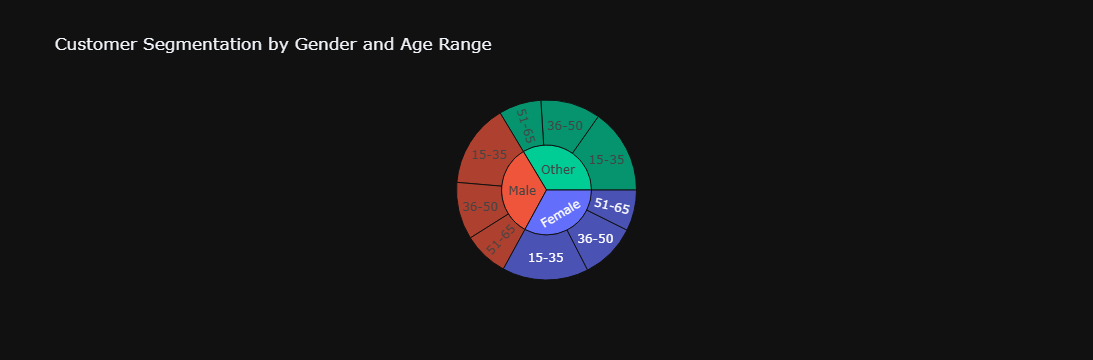

In [123]:
import plotly.graph_objects as go
import plotly.express as px

data = {
    'Gender': ['Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Other', 'Other', 'Other'],
    'AgeRange': ['15-35', '36-50', '51-65', '15-35', '36-50', '51-65', '15-35', '36-50', '51-65'],
    'Sales': [222055.16, 144566.68, 105309.66, 215134.56, 147386.90, 116083.45, 218094.05, 154195.68, 109143.56]
}
customer_segmentation = pd.DataFrame(data)
fig = px.sunburst(
    customer_segmentation,
    path=['Gender', 'AgeRange'],
    values='Sales',
    color='Gender',
    template="plotly_dark",
    title="Customer Segmentation by Gender and Age Range"
)
fig.show()

In [134]:
# Set reference date for 'Recency' (usually the most recent transaction + 1 day)
reference_date = df['Date'].max() + pd.Timedelta(days=1)
# Group by CustomerID and calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'TransactionID': 'count',                            # Frequency
    'Total Amount': 'sum'                                # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm)

     CustomerID  Recency  Frequency  Monetary
0             1        3         20   2405.00
1             2       18         22   3376.61
2             3        1         23   3986.23
3             4        8         27   3844.14
4             5      373         15   2401.23
..          ...      ...        ...       ...
495         496        8         14   1919.55
496         497        2         25   3384.75
497         498       13         20   2957.41
498         499        8         31   5954.11
499         500       16         21   3352.57

[500 rows x 4 columns]


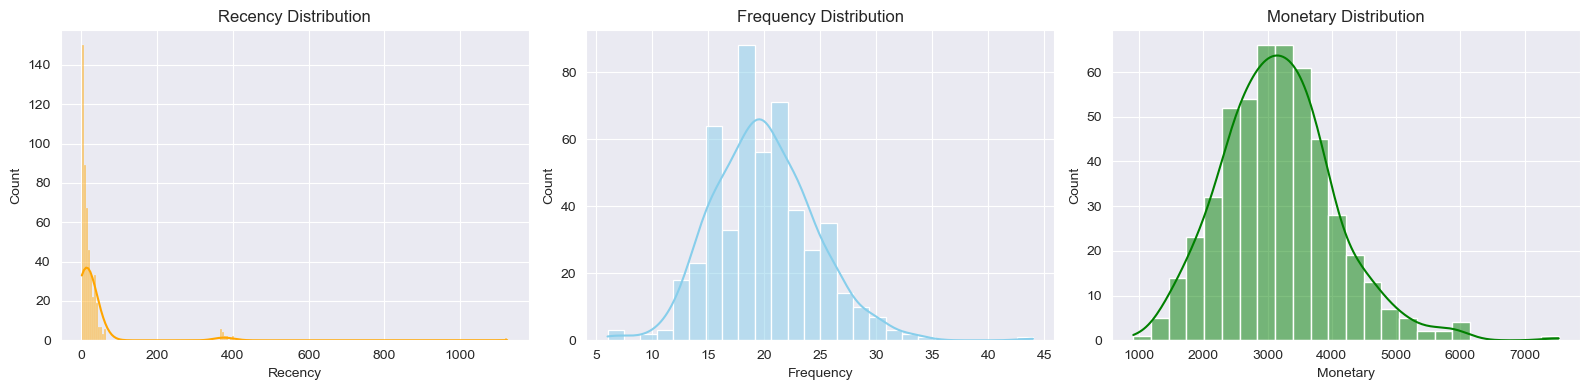

In [133]:
# Recency: How recently a customer made a purchase. Customers who bought recently are more likely to buy again.
# Frequency: How often a customer makes purchases. Frequent buyers are typically more engaged and loyal.
# Monetary: How much money a customer spends. High spenders are often more valuable and deserve special attention.
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True, color='orange')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True, color='skyblue')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True, color='green')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


##### 🛍️ Product & Category Performance

In [124]:
# Total number of products sold in each category.

total_quantity_by_category = df.groupby('Category')['Quantity'].sum() # Group by 'Category' and sum the 'Quantity' sold
print(total_quantity_by_category)

Category
Clothing       5857
Decorations    5897
Electronics    6226
Food           6021
Toys           6105
Name: Quantity, dtype: int64


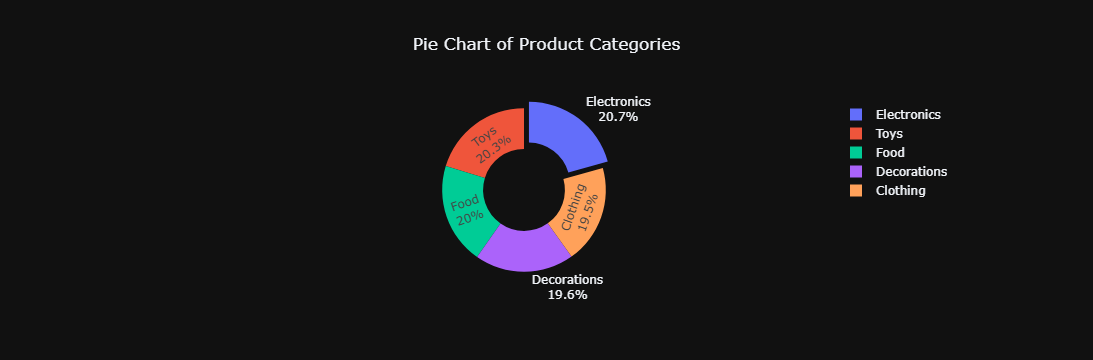

In [125]:
Category = ['Clothing', 'Decorations', 'Electronics', 'Food', 'Toys']
TotalProductSold = [5857, 5897, 6226, 6021, 6105]

fig = go.Figure(data=[go.Pie(labels=Category, values=TotalProductSold, hole=0.5)]) # Create Pie Chart
fig.update_traces(textinfo='percent+label', pull=[0, 0, 0.1, 0, 0])  # Set the layout
# Add title and labels
fig.update_layout(
    title="Pie Chart of Product Categories",
    title_x=0.5,
    template="plotly_dark",
    showlegend=True
)
fig.show()

In [126]:
# Total sales of products sold in each category.

total_amount_by_category = df.groupby('Category')['Total Amount'].sum() # Group by 'Category' and sum the 'Quantity' sold
print(total_amount_by_category)

Category
Clothing       307433.59
Decorations    310270.66
Electronics    321932.85
Food           318837.62
Toys           326239.97
Name: Total Amount, dtype: float64


In [127]:
# Your category and values
data = {
    'Clothing': 307433.59,
    'Decorations': 310270.66,
    'Electronics': 321932.85,
    'Food': 318837.62,
    'Toys': 326239.97
}
# Convert to DataFrame
Category_df = pd.DataFrame(list(data.items()), columns=['Category', 'Total Amount'])
print(Category_df)

      Category  Total Amount
0     Clothing     307433.59
1  Decorations     310270.66
2  Electronics     321932.85
3         Food     318837.62
4         Toys     326239.97


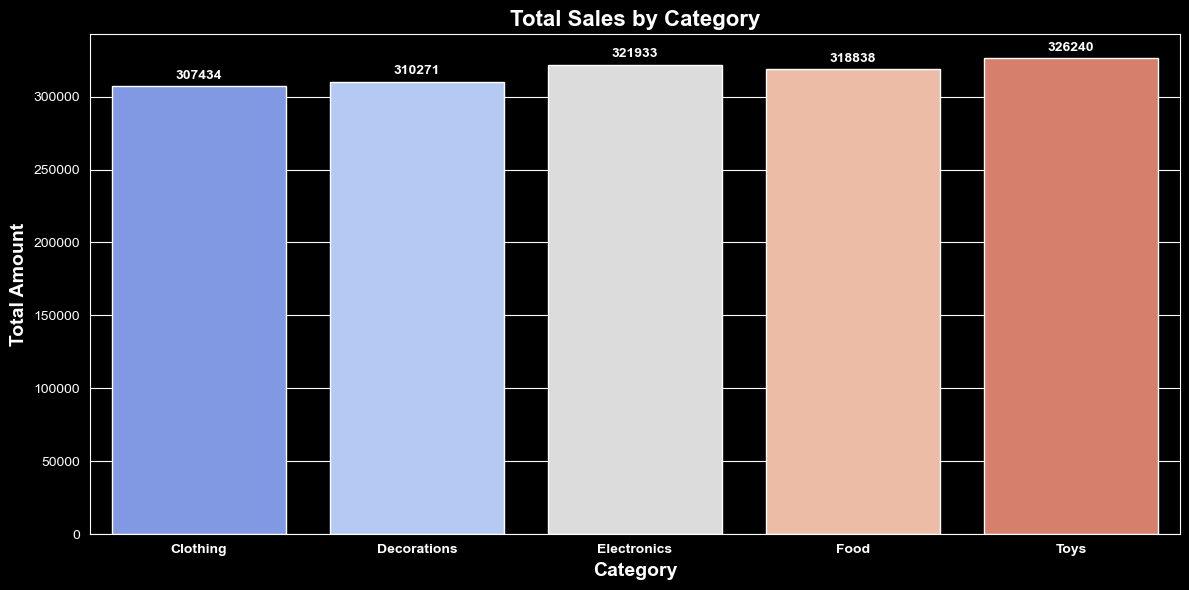

In [144]:
plt.style.use('dark_background')
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plotting the bar chart
barplot = sns.barplot(x='Category', y='Total Amount', data=Category_df, hue = 'Category', palette='coolwarm')
plt.xticks(rotation=360, fontweight='bold')
plt.title('Total Sales by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Total Amount', fontsize=14, fontweight='bold')
# Add value labels on top of each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, fontweight='bold', padding=3)

plt.tight_layout()  # Adjust the plot to fit everything
plt.show()

##### 🎄Sales Trend Over Time (By Month + Highlighting Christmas Spikes)

In [94]:
# Create a 'Month' column
df['Month'] = df['Date'].dt.to_period('M')

timeseries = df.groupby('Month')['Total Amount'].sum() # Group by 'Category' and sum the 'Quantity' sold
print(timeseries)

Month
2018-11    135202.55
2018-12    137641.65
2019-11    121750.80
2019-12    133957.32
2020-11    129549.00
2020-12    131951.54
2021-11    128353.72
2021-12    136613.27
2022-11    129606.29
2022-12    126003.85
2023-11    132939.59
2023-12    141145.11
Freq: M, Name: Total Amount, dtype: float64


##### 💳 Payment Effectiveness

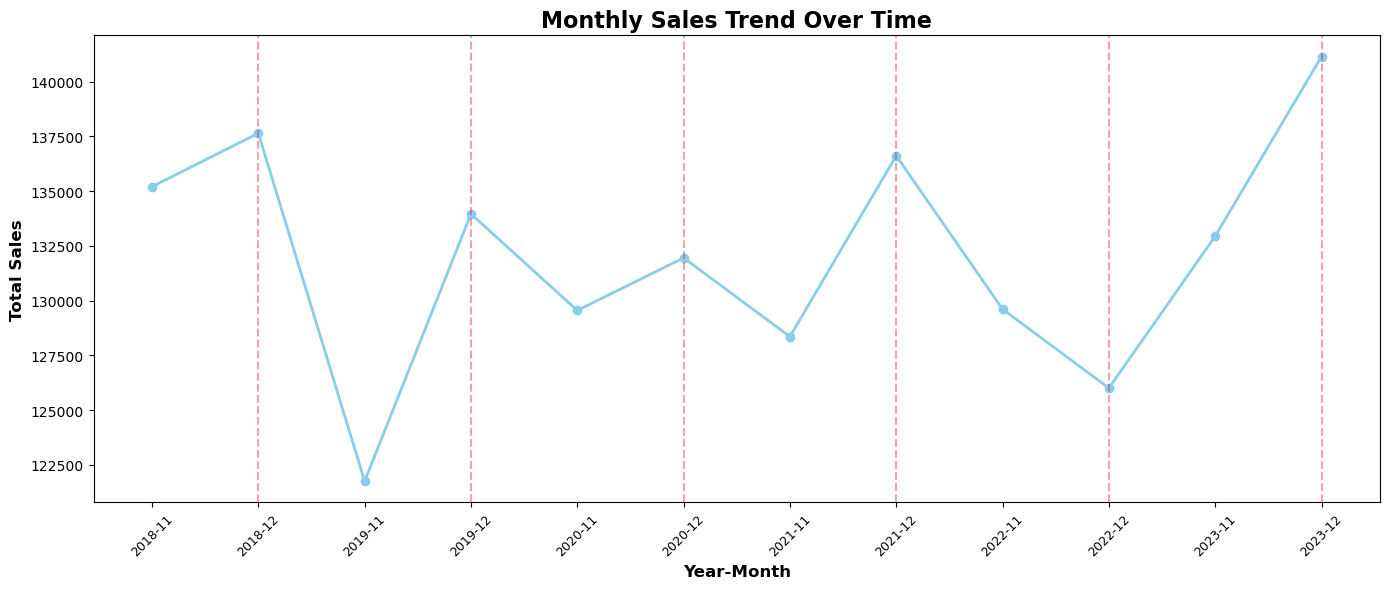

In [170]:
plt.style.use('default')

# Create Year-Month column for grouping
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

# Aggregate total sales by Year-Month
monthly_sales = df.groupby('YearMonth')['Total Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Total Amount'], marker='o', color='skyblue', linewidth=2)
plt.xticks(rotation=45, fontsize=9)
plt.title('Monthly Sales Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year-Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12, fontweight='bold')

# Highlight December months
for i, row in monthly_sales.iterrows():
    if '-12' in row['YearMonth']:
        plt.axvline(x=row['YearMonth'], color='crimson', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [142]:
payment_method = df.groupby('PaymentType')['Total Amount'].sum() 
print(payment_method)

PaymentType
Cash              404315.24
Credit Card       402693.20
Debit Card        385703.36
Online Payment    392002.89
Name: Total Amount, dtype: float64


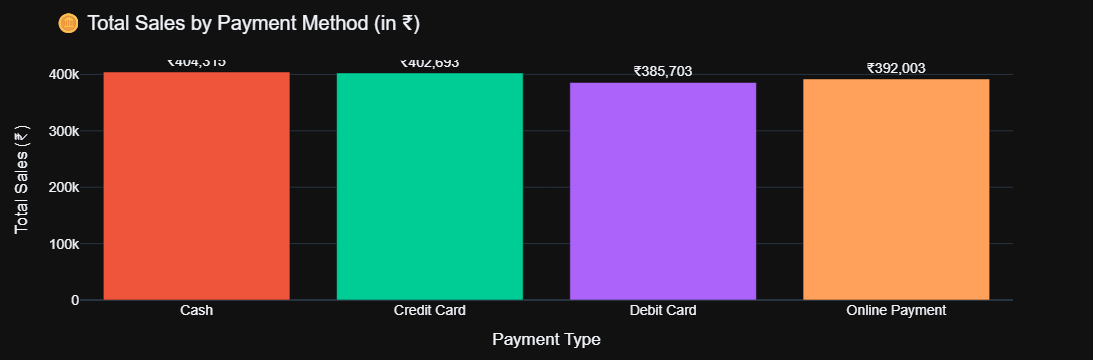

In [146]:
import plotly.graph_objects as go

# Data (in rupees)
payment_data = {
    'PaymentType': ['Cash', 'Credit Card', 'Debit Card', 'Online Payment'],
    'Total Amount (₹)': [404315.24, 402693.20, 385703.36, 392002.89]
}

# Color for each bar
bar_colors = ['#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

# Creating the figure
fig = go.Figure(go.Bar(
    x=payment_data['PaymentType'],
    y=payment_data['Total Amount (₹)'],
    text=[f"₹{amt:,.0f}" for amt in payment_data['Total Amount (₹)']],
    textposition='outside',  # places label on top of bar
    marker_color=bar_colors
))

# Layout Adjustment
fig.update_layout(
    template='plotly_dark',
    title='🪙 Total Sales by Payment Method (in ₹)',
    xaxis_title='Payment Type',
    yaxis_title='Total Sales (₹)',
    font=dict(family='Arial', size=14),
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    margin=dict(t=60, b=60)
)
fig.show()

##### 🎁 Return Analysis & Satisfaction

In [162]:
category_returns

,Category,ReturnFlag,ReturnRate (%)
0,Clothing,0.484615,48.461538
1,Decorations,0.508271,50.827068
2,Electronics,0.517292,51.729177
3,Food,0.506278,50.627825
4,Toys,0.509697,50.969667


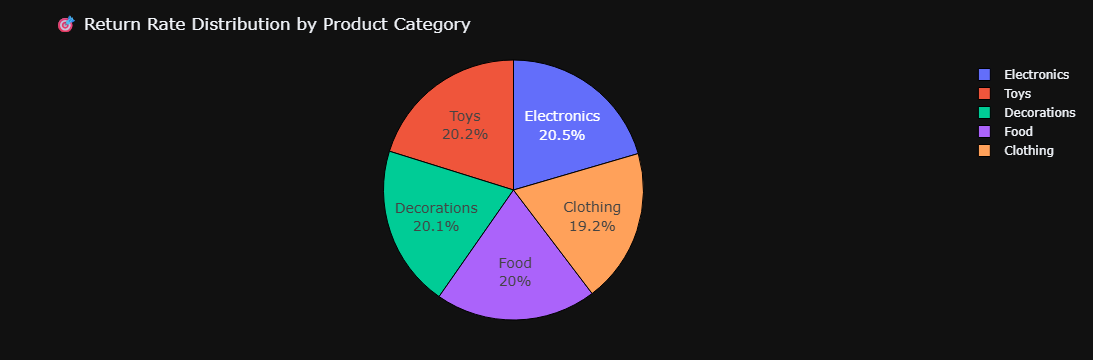

In [160]:
# Calculate return rate per category
category_returns = df.groupby('Category')['ReturnFlag'].mean().reset_index()

# Convert return rates to percentages (optional for clarity)
category_returns['ReturnRate (%)'] = category_returns['ReturnFlag'] * 100

fig = go.Figure(go.Pie(
    labels=category_returns['Category'],
    values=category_returns['ReturnRate (%)'],
    hoverinfo='label+percent+value',
    textinfo='label+percent',
    textfont=dict(size=14),
    marker=dict(line=dict(color='black', width=1))
))

# layout Adjustment
fig.update_layout(
    title="🎯 Return Rate Distribution by Product Category",
    template='plotly_dark',
    margin=dict(t=60, b=40)
)

fig.show()

In [155]:
# Return rate by GiftWrap status
giftwrap_returns = df.groupby('GiftWrap')['ReturnFlag'].mean().reset_index()

# Optional: Add count for perspective
giftwrap_counts = df.groupby('GiftWrap')['ReturnFlag'].agg(['mean', 'count']).reset_index()
print(giftwrap_counts)

   GiftWrap      mean  count
0     False  0.507337   4975
1      True  0.503483   5025


In [157]:
category_satisfaction = df.groupby('Category')['CustomerSatisfaction'].mean().reset_index()
event_satisfaction = df.groupby('Event')['CustomerSatisfaction'].mean().reset_index()

In [158]:
event_satisfaction

,Event,CustomerSatisfaction
0,Black Friday,2.990597
1,Christmas Market,2.971458
2,Other,2.981677


In [159]:
category_satisfaction

,Category,CustomerSatisfaction
0,Clothing,2.983590
1,Decorations,3.012531
2,Electronics,3.002923
3,Food,2.927172
4,Toys,2.985579


##### 📍 Geo-based Insights (Location)

In [165]:
# Group by location to calculate key metrics
city_metrics = df.groupby('Location').agg(
    Revenue=('Total Amount', 'sum'),
    ReturnCount=('ReturnFlag', 'sum'),
    Orders=('TransactionID', 'count')
).reset_index()

city_metrics['AvgOrderValue'] = city_metrics['Revenue'] / city_metrics['Orders'] # Average order value per city
city_metrics = city_metrics.sort_values(by='Revenue', ascending=False) # Sort by Revenue
print(city_metrics.head(10)) # Display top cities

   Location   Revenue  ReturnCount  Orders  AvgOrderValue
4   City_13  87143.19          289     550     158.442164
0    City_1  83673.03          259     516     162.157035
6   City_15  83657.25          255     505     165.657921
11   City_2  82951.02          268     499     166.234509
10  City_19  82923.32          249     508     163.234882
3   City_12  82875.33          276     517     160.300445
9   City_18  81511.03          233     516     157.967112
14   City_4  81088.83          254     512     158.376621
12  City_20  80874.73          250     492     164.379533
16   City_6  79968.78          268     503     158.983658


In [166]:
# Total sales per City × Category
city_category_sales = df.pivot_table(
    index='Location',
    columns='Category',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
).round(2)

# Optional: Normalize per city to get preference ratios
city_pref = city_category_sales.div(city_category_sales.sum(axis=1), axis=0)

print(city_pref.head())


Category  Clothing  Decorations  Electronics      Food      Toys
Location                                                        
City_1    0.198089     0.164094     0.204880  0.240607  0.192330
City_10   0.199641     0.200653     0.208895  0.196329  0.194482
City_11   0.181348     0.231390     0.182165  0.213857  0.191241
City_12   0.206032     0.180212     0.189638  0.211602  0.212516
City_13   0.232627     0.167982     0.171876  0.176708  0.250806


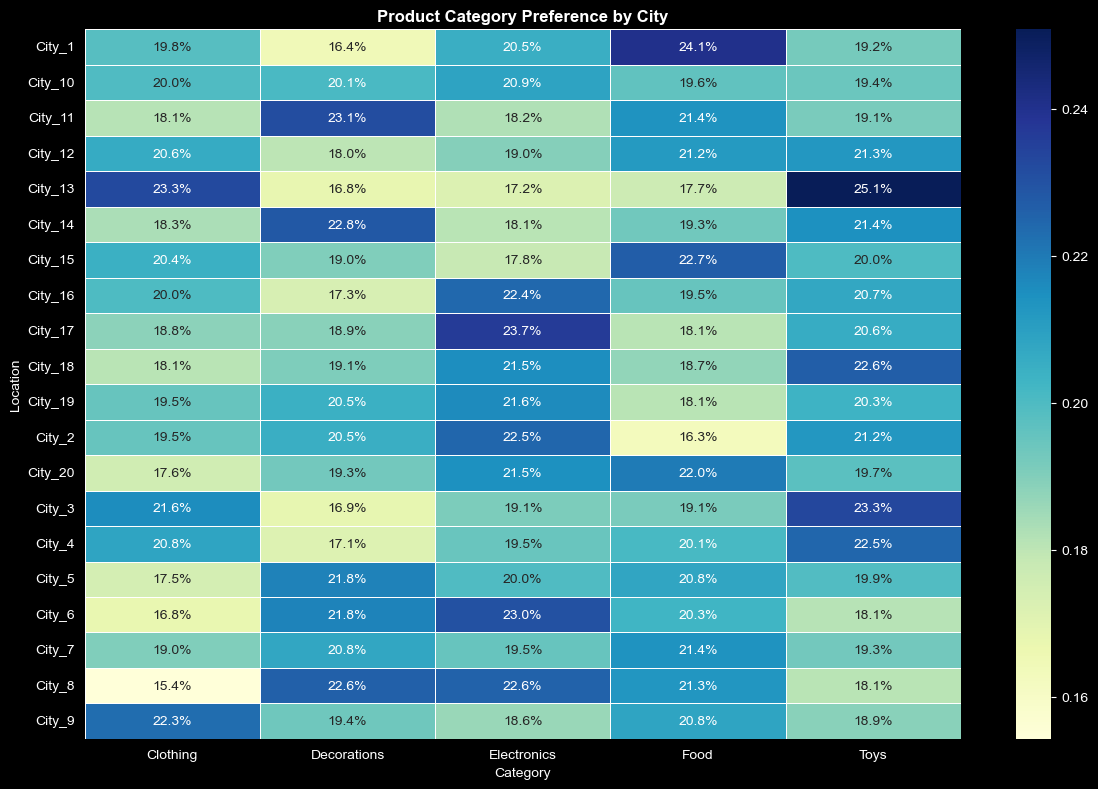

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(city_pref, cmap='YlGnBu', annot=True, fmt=".1%", linewidths=0.5)
plt.title('Product Category Preference by City', fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
💳 4. Payment and Promotion Effectiveness:
Payment Method Trends: Which payment types are most commonly used for high-value transactions?

Promotion Impact: Compare Total Amount for transactions with and without PromotionApplied using box plots or averages.

🎁 5. Return Analysis & Satisfaction:
Return Trends: Explore relationships between ReturnFlag, Category, or GiftWrap. Are certain products returned more often?

Customer Satisfaction Drivers: Use groupings or regression to see if CustomerSatisfaction correlates with returns, events, or product type.

📍 6. Geo-based Insights (Location):
City-level Trends: Rank cities by revenue, number of returns, average order value.

Location × Category Matrix: Which cities prefer which product types?

📈 7. Visualizations to Bring It Alive:
Heatmaps (e.g., satisfaction × category)

Bar charts (top locations or return rates)

Time series line plots (sales trends)

Pie charts (distribution of promotions or payment types)